<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/d3-house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Source: UCI
### Initial format: excel

The real estate valuation dataset is a multivariate regression problem focused on predicting house prices based on historical market data from Sindian District, New Taipei City, Taiwan. It contains 414 instances and 6 features, including variables such as transaction date, house age, distance to the nearest MRT station, number of convenience stores, and geographic coordinates (latitude and longitude). The target variable is the house price per unit area, measured in 10,000 New Taiwan Dollars per Ping. The dataset is complete with no missing values and was split into training (2/3) and testing (1/3) sets. This dataset is widely used for building real estate valuation models, as demonstrated in the 2018 paper by I. Yeh and Tzu-Kuang Hsu, published in Applied Soft Computing.

##import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## set-up

In [3]:
df = pd.read_excel('housePrice.xlsx', header=None)
df.head(10)

,0,1,2,3,4,5,6,7
0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,1,2012.916667,32,84.87882,10,24.98298,121.54024,37.9
2,2,2012.916667,19.5,306.5947,9,24.98034,121.53951,42.2
3,3,2013.583333,13.3,561.9845,5,24.98746,121.54391,47.3
4,4,2013.5,13.3,561.9845,5,24.98746,121.54391,54.8
5,5,2012.833333,5,390.5684,5,24.97937,121.54245,43.1
6,6,2012.666667,7.1,2175.03,3,24.96305,121.51254,32.1
7,7,2012.666667,34.5,623.4731,7,24.97933,121.53642,40.3
8,8,2013.416667,20.3,287.6025,6,24.98042,121.54228,46.7
9,9,2013.5,31.7,5512.038,1,24.95095,121.48458,18.8


because the first column is the name of the variables, we gonna make it right.

In [4]:
df.columns = df.iloc[0]
df = df[1:] #delete first column
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,1,2012.916667,32,84.87882,10,24.98298,121.54024,37.9
2,2,2012.916667,19.5,306.5947,9,24.98034,121.53951,42.2
3,3,2013.583333,13.3,561.9845,5,24.98746,121.54391,47.3
4,4,2013.5,13.3,561.9845,5,24.98746,121.54391,54.8
5,5,2012.833333,5,390.5684,5,24.97937,121.54245,43.1


looks like the spaces not good to see.

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.head(25)

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
1,1,2012.916667,32,84.87882,10,24.98298,121.54024,37.9
2,2,2012.916667,19.5,306.5947,9,24.98034,121.53951,42.2
3,3,2013.583333,13.3,561.9845,5,24.98746,121.54391,47.3
4,4,2013.5,13.3,561.9845,5,24.98746,121.54391,54.8
5,5,2012.833333,5,390.5684,5,24.97937,121.54245,43.1
6,6,2012.666667,7.1,2175.03,3,24.96305,121.51254,32.1
7,7,2012.666667,34.5,623.4731,7,24.97933,121.53642,40.3
8,8,2013.416667,20.3,287.6025,6,24.98042,121.54228,46.7
9,9,2013.5,31.7,5512.038,1,24.95095,121.48458,18.8
10,10,2013.416667,17.9,1783.18,3,24.96731,121.51486,22.1


better variables name ig.

Dataset Information:
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude. (unit: degree)
X6=the geographic coordinate, longitude. (unit: degree)

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 1 to 414
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   No                                      414 non-null    object
 1   X1_transaction_date                     414 non-null    object
 2   X2_house_age                            414 non-null    object
 3   X3_distance_to_the_nearest_MRT_station  414 non-null    object
 4   X4_number_of_convenience_stores         414 non-null    object
 5   X5_latitude                             414 non-null    object
 6   X6_longitude                            414 non-null    object
 7   Y_house_price_of_unit_area              414 non-null    object
dtypes: object(8)
memory usage: 26.0+ KB


the fact that in the information all variable must be integer (numeric).

In [8]:
for col in df.columns:
    if col != 'X4_number_of_convenience_stores':
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('int')
df.head(10)

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
1,1.0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2.0,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,3.0,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,4.0,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
6,6.0,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,7.0,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
8,8.0,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
9,9.0,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
10,10.0,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 1 to 414
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    float64
 1   X1_transaction_date                     414 non-null    float64
 2   X2_house_age                            414 non-null    float64
 3   X3_distance_to_the_nearest_MRT_station  414 non-null    float64
 4   X4_number_of_convenience_stores         414 non-null    int64  
 5   X5_latitude                             414 non-null    float64
 6   X6_longitude                            414 non-null    float64
 7   Y_house_price_of_unit_area              414 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 26.0 KB


In [10]:
df = df.drop(df.columns[0], axis=1)

In [14]:
df.isnull().sum()

,0
0,
X1_transaction_date,0
X2_house_age,0
X3_distance_to_the_nearest_MRT_station,0
X4_number_of_convenience_stores,0
X5_latitude,0
X6_longitude,0
Y_house_price_of_unit_area,0


In [11]:
df.head(6)

,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1


X1 a lil bit confusing, so i want to do EDA deeper.

X1_transaction_date

In [12]:
df['X1_transaction_date'].describe()

,X1_transaction_date
count,414.000000
mean,2013.148953
std,0.281995
min,2012.666667
25%,2012.916667
50%,2013.166667
75%,2013.416667
max,2013.583333


In [15]:
df['year'] = df['X1_transaction_date'].apply(lambda x: int(x))
yearly_counts = df['year'].value_counts().sort_index()

print("Number of transactions per year:")
print(yearly_counts)
print("\n")

Number of transactions per year:
year
2012    126
2013    288
Name: count, dtype: int64




<ipython-input-16-32b69dbe071a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


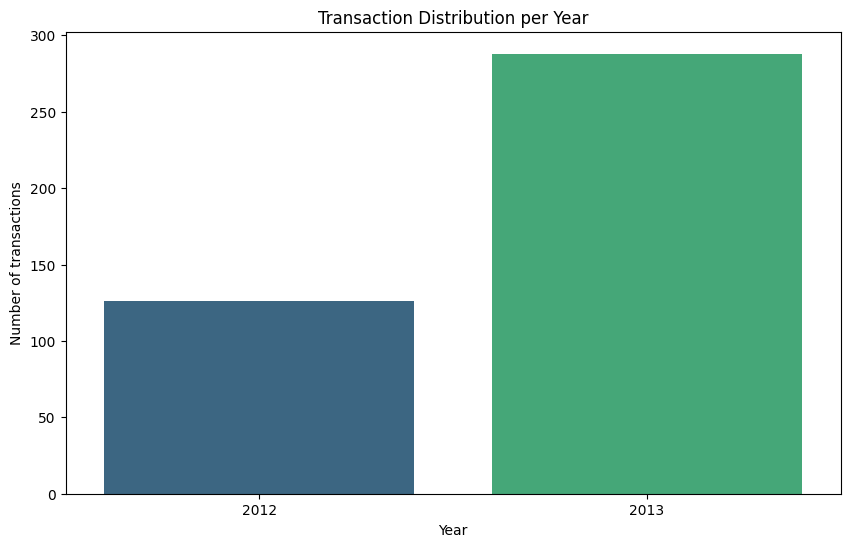

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Transaction Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.show()

In [17]:
df['month'] = df['X1_transaction_date'].apply(lambda x: round((x - int(x)) * 12) + 1)
monthly_counts = df['month'].value_counts().sort_index()

print("Number of transactions per month:")
print(monthly_counts)
print("\n")

Number of transactions per month:
month
1     28
2     46
3     25
4     32
5     29
6     58
7     47
8     23
9     30
10    27
11    31
12    38
Name: count, dtype: int64




<ipython-input-18-f02e3ba4e5c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='viridis')


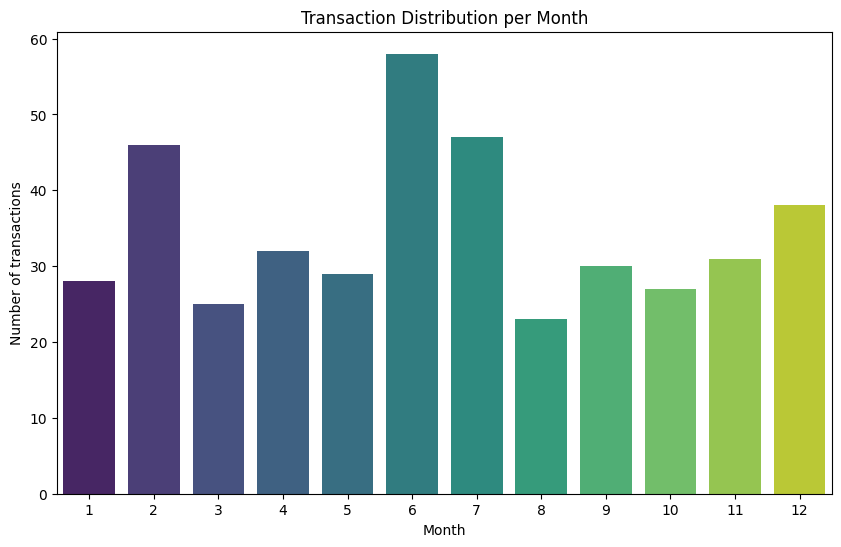

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Transaction Distribution per Month')
plt.xlabel('Month')
plt.ylabel('Number of transactions')
plt.show()

In [19]:
df['year_month'] = df['X1_transaction_date'].apply(lambda x: f"{int(x)}-{round((x - int(x)) * 12) + 1:02d}")
year_month_counts = df['year_month'].value_counts().sort_index()

print("Number of transactions per year and month:")
print(year_month_counts)
print("\n")

Number of transactions per year and month:
year_month
2012-09    30
2012-10    27
2012-11    31
2012-12    38
2013-01    28
2013-02    46
2013-03    25
2013-04    32
2013-05    29
2013-06    58
2013-07    47
2013-08    23
Name: count, dtype: int64




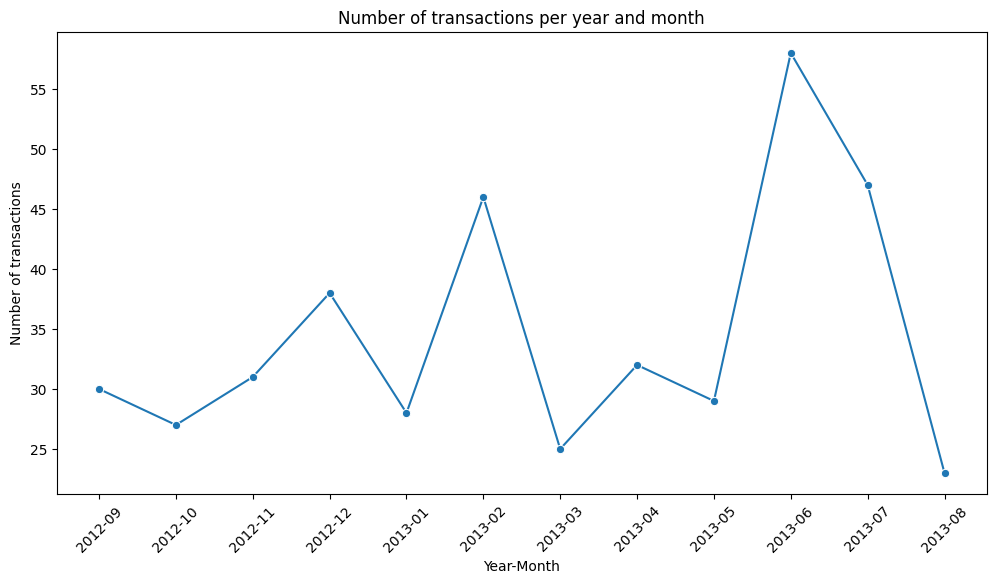

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_month_counts.index, y=year_month_counts.values, marker='o')
plt.title('Number of transactions per year and month')
plt.xlabel('Year-Month')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.head(5)

,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,year,month,year_month
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12,2012-12
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12,2012-12
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013,8,2013-08
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7,2013-07
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012,11,2012-11


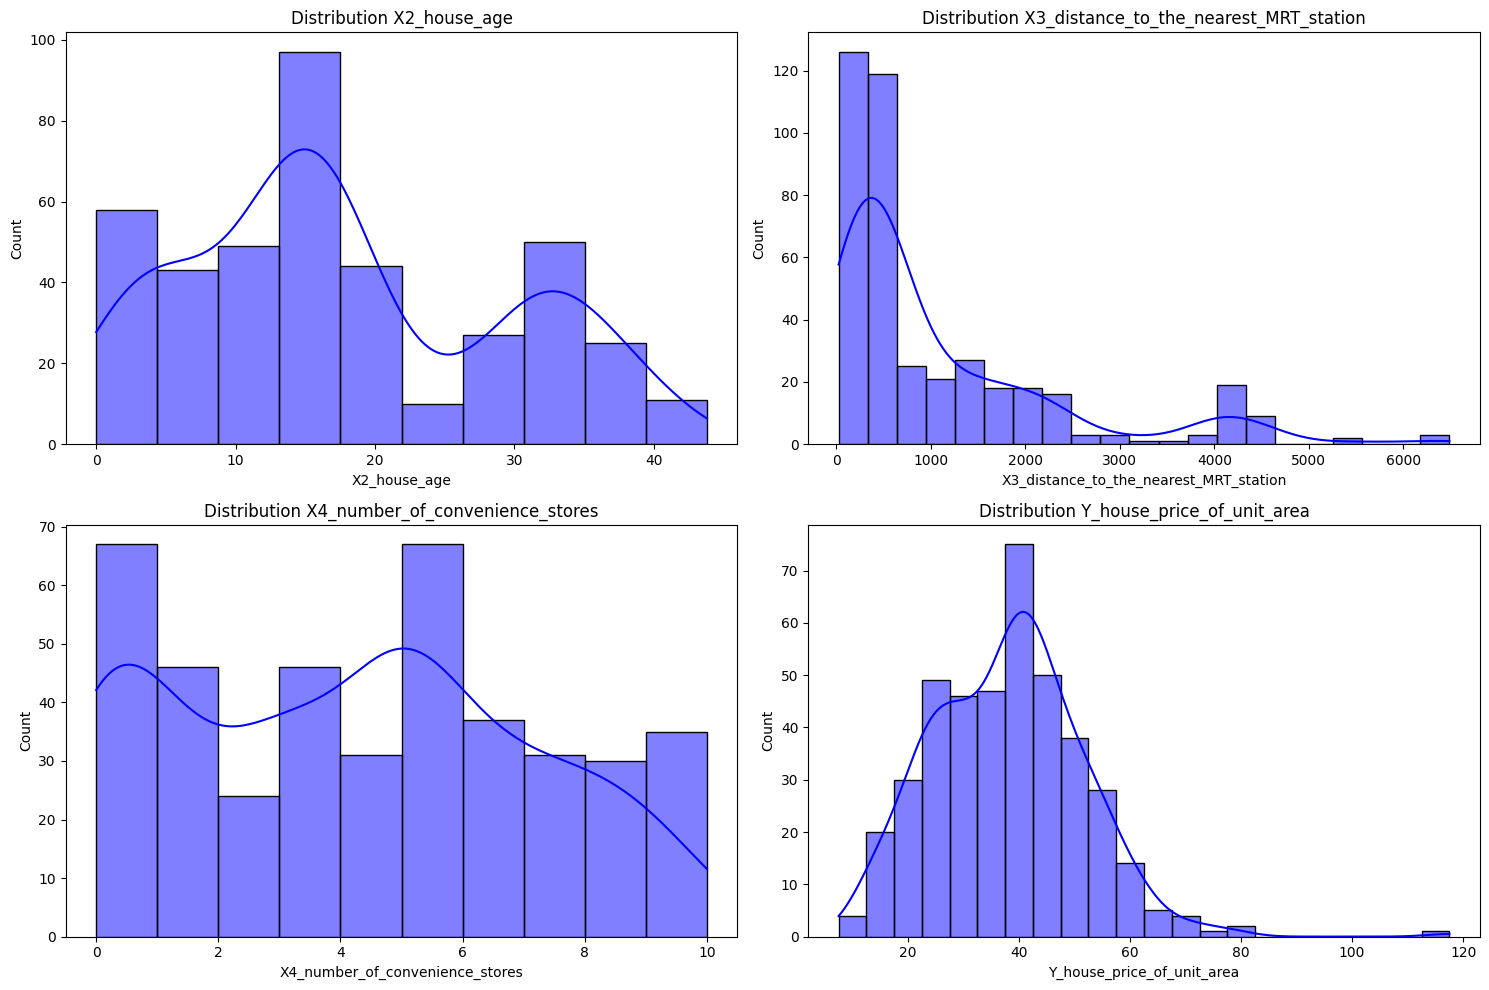

In [24]:
numerical_vars = ['X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
                  'X4_number_of_convenience_stores', 'Y_house_price_of_unit_area']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], kde=True, color='blue')
    plt.title(f'Distribution {var}')
plt.tight_layout()
plt.show()

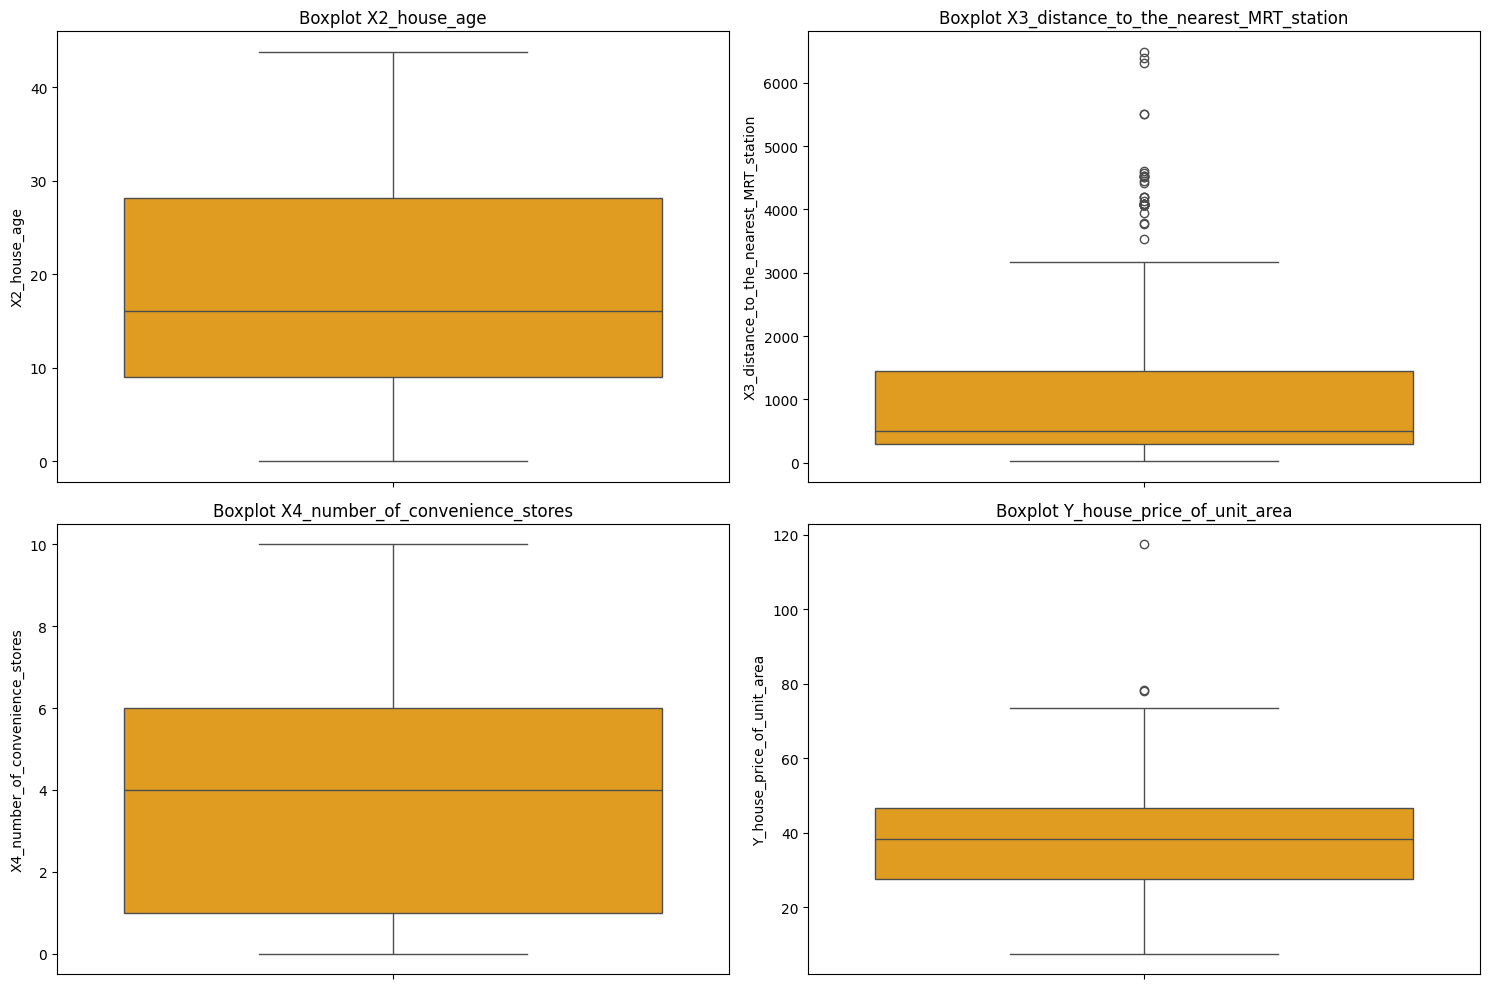

In [25]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[var], color='orange')
    plt.title(f'Boxplot {var}')
plt.tight_layout()
plt.show()

In [26]:
correlation_matrix = df[numerical_vars].corr()
print("Corr:")
print(correlation_matrix)
print("\n")

Corr:
0                                       X2_house_age  \
0                                                      
X2_house_age                                1.000000   
X3_distance_to_the_nearest_MRT_station      0.025622   
X4_number_of_convenience_stores             0.049593   
Y_house_price_of_unit_area                 -0.210567   

0                                       X3_distance_to_the_nearest_MRT_station  \
0                                                                                
X2_house_age                                                          0.025622   
X3_distance_to_the_nearest_MRT_station                                1.000000   
X4_number_of_convenience_stores                                      -0.602519   
Y_house_price_of_unit_area                                           -0.673613   

0                                       X4_number_of_convenience_stores  \
0                                                                         
X2_house_age  

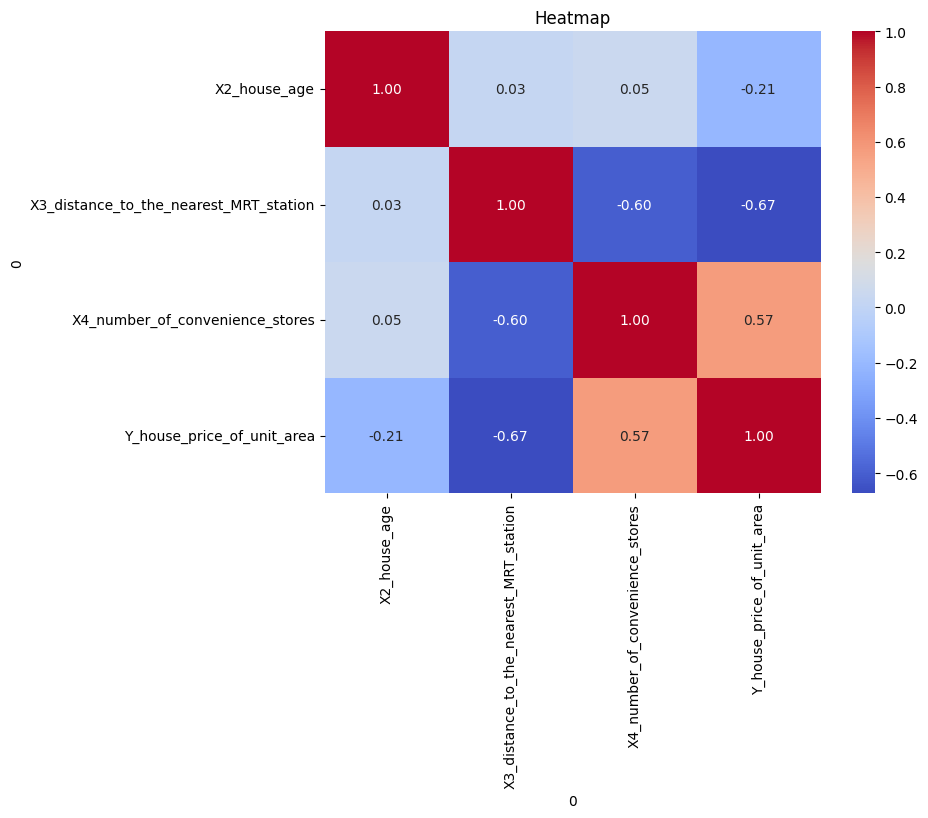

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

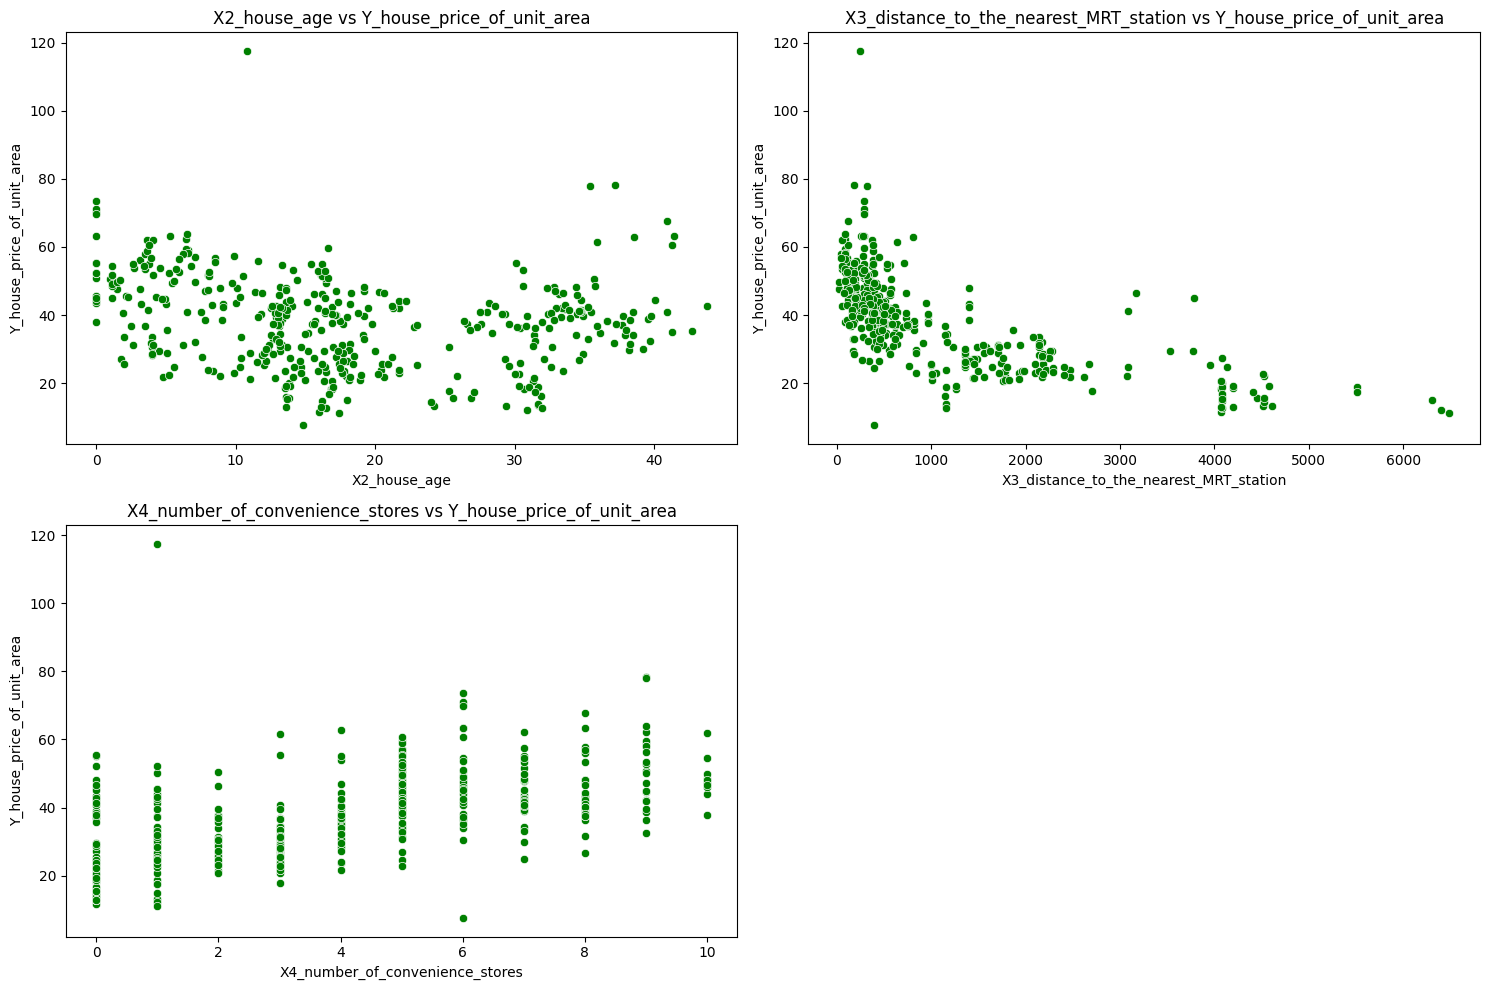

In [28]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars[:-1], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[var], y=df['Y_house_price_of_unit_area'], color='green')
    plt.title(f'{var} vs Y_house_price_of_unit_area')
plt.tight_layout()
plt.show()

it's quite unique to see scatter plot of X4 hmmm.

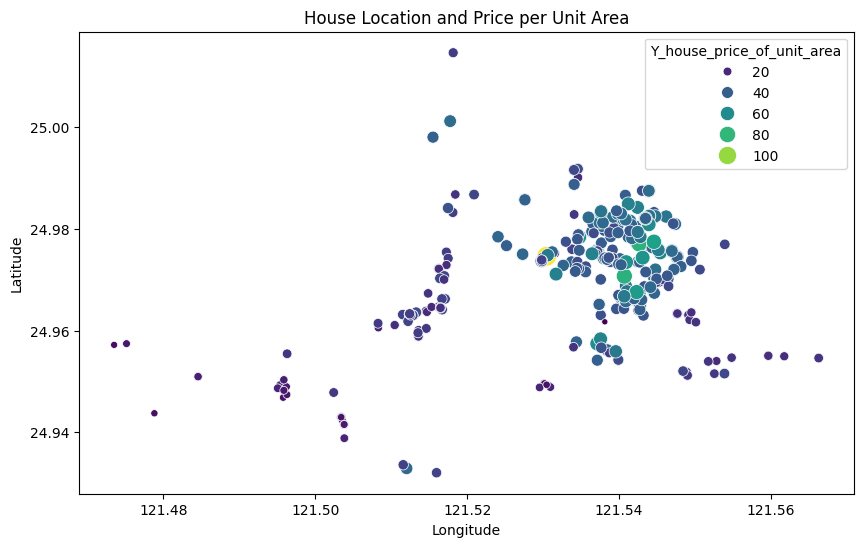

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['X6_longitude'], y=df['X5_latitude'], hue=df['Y_house_price_of_unit_area'], palette='viridis', size=df['Y_house_price_of_unit_area'], sizes=(20, 200))
plt.title('House Location and Price per Unit Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [30]:
import scipy.stats as stats
print("Normality Test (Shapiro-Wilk):")
for var in numerical_vars:
    stat, p = stats.shapiro(df[var])
    print(f"{var}: Statistic={stat:.4f}, p-value={p:.4f}")
print("\n")

Normality Test (Shapiro-Wilk):
X2_house_age: Statistic=0.9467, p-value=0.0000
X3_distance_to_the_nearest_MRT_station: Statistic=0.7381, p-value=0.0000
X4_number_of_convenience_stores: Statistic=0.9374, p-value=0.0000
Y_house_price_of_unit_area: Statistic=0.9727, p-value=0.0000




no variables are normally distributed based on this test huh

In [31]:
df.columns

Index(['X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area', 'year', 'month', 'year_month'],
      dtype='object', name=0)

# preprocessing

In [32]:
X = df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 'year', 'month']]
y = df['Y_house_price_of_unit_area']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## modelling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [36]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Support Vector Regressor": SVR()
}

In [37]:
results = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                               MAE        MSE        R²
Linear Regression         5.346334  54.062042  0.677741
Decision Tree             5.532530  58.115904  0.653577
Random Forest             4.022869  31.678292  0.811169
XGBoost                   4.349145  38.198670  0.772301
Support Vector Regressor  5.804218  62.129526  0.629652


Based on the evaluation results, the Random Forest Regressor demonstrated the best performance with the smallest MAE (4.02), the lowest MSE (31.68), and the highest R² (0.81). This indicates that the model is capable of predicting house prices with the smallest error compared to other models.

In a brief analysis, Linear Regression and Decision Tree models showed suboptimal performance, likely due to tendencies toward overfitting or lack of flexibility. XGBoost performed reasonably well with an R² of 0.77 but still fell short compared to Random Forest. On the other hand, the Support Vector Regressor (SVR) had the poorest performance with an R² of 0.63, possibly because the features were not sufficiently linear or the parameters needed tuning